# cobaya example
You can run this if you have cobaya installed on your computer (see https://cobaya.readthedocs.io/en/latest/)

You will need to set the cobaya_modules_path variable below to wherever the cobaya cosmological codes and likelihoods are installed on your computer

This plots a slice the low-ell EE likelihood for different values of tau, and the low-ell TT likelihood for different values of n_s.

For more about the model wrapper of cobaya see https://cobaya.readthedocs.io/en/latest/cosmo_model.html

In [1]:
cobaya_modules_path='/Users/heatherp/cobaya-cosmo'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from cobaya.model import get_model
from cobaya.yaml import yaml_load

In [3]:
info_txt = r'''
likelihood:
  planck_low_py_EE: import_module('planck_low_py').planck_lowE_binned_loglike_cobaya
  planck_low_py_TT: import_module('planck_low_py').planck_lowT_binned_loglike_cobaya
  planck_2018_highl_plik.TTTEEE_lite: null
params:
  # fixed
  H0: 67
  ombh2: 0.022
  omch2: 0.12
  # sampled
  As:
    prior:
      min: 1e-9
      max: 6e-9
  ns:
    prior:
      min: 0.8
      max: 1.2
  tau:
    prior:
      min: 0.005
      max: 0.8
theory:
  camb:
'''

In [4]:
info = yaml_load(info_txt)
info['modules'] = cobaya_modules_path

In [5]:
model = get_model(info)

[model] *WARNING* Ignored blocks/options: ['modules']
[camb] Importing *auto-installed* CAMB (but defaulting to *global*).
[camb] Initialized!
[planck_low_py_ee] *WARNING* The use of a `_theory` argument to deal with requirements will be deprecated in a future version. From now on please indicate your requirements as the value of field 'requires' in the likelihood info (see documentation) and have your function take a parameter `_self`.
[planck_low_py_ee] Initialized external likelihood.
[planck_low_py_tt] *WARNING* The use of a `_theory` argument to deal with requirements will be deprecated in a future version. From now on please indicate your requirements as the value of field 'requires' in the likelihood info (see documentation) and have your function take a parameter `_self`.
[planck_low_py_tt] Initialized external likelihood.
[clik] Importing *auto-installed* clik (but defaulting to *global*).
[planck_2018_highl_plik.ttteee_lite] Initialized!


In [6]:
point={'As': 2.1e-9, 'ns': 0.97, 'tau': 0.054, 'A_planck': 1}
logposterior = model.logposterior(point)
print('   loglikelihoods: %r' % dict(zip(list(model.likelihood), logposterior.loglikes)))

   loglikelihoods: {'planck_low_py_EE': 9.657378671445292, 'planck_low_py_TT': -11.661059579231594, 'planck_2018_highl_plik.TTTEEE_lite': -304.7233213973714}


## EE tau slice

In [7]:
n=11
tau_arr = np.linspace(0.054-0.03, 0.054+0.03, n)
loglike_tau_EE=np.empty_like(tau_arr)
for i, tau in enumerate(tau_arr):
    loglikes=model.loglikes({'tau': tau, 'As': 2.1e-9, 'ns': 0.97, 'A_planck': 1})[0]
    loglike_tau_EE[i]=loglikes[0]

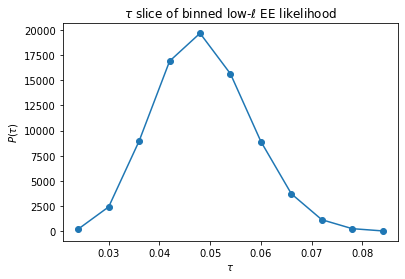

In [8]:
plt.plot(tau_arr, np.exp(loglike_tau_EE), marker='o')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$P(\tau)$')
plt.title(r'$\tau$ slice of binned low-$\ell$ EE likelihood')
plt.show()

## TT n_s slice

In [9]:
n=11
ns_arr = np.linspace(0.9, 1.05, n)
loglike_ns_TT=np.empty_like(ns_arr)
for i, ns in enumerate(ns_arr):
    loglikes=model.loglikes({'ns': ns, 'As': 2.1e-9, 'tau': 0.054, 'A_planck': 1})[0]
    loglike_ns_TT[i]=loglikes[1]

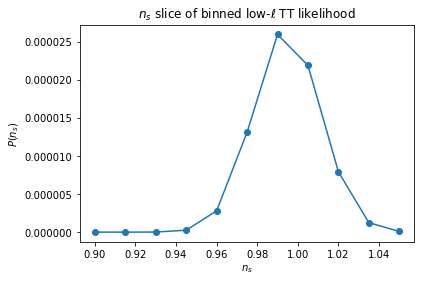

In [10]:
plt.plot(ns_arr, np.exp(loglike_ns_TT), marker='o')
plt.xlabel(r'$n_s$')
plt.ylabel(r'$P(n_s)$')
plt.title(r'$n_s$ slice of binned low-$\ell$ TT likelihood')
plt.show()